In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataPreped.csv')

In [3]:
df.head(2)

,Unnamed: 0,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,NONVEH,DATE,MONTH,TIME,WKDAY
0,0,Intersection,Injury,Angles,2,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,N,0,2013-03-27,3,14,Wednesday
1,1,Block,Property damage,Sideswipe,2,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",N,Raining,Wet,Dark - Street Lights On,N,0,2006-12-20,12,18,Wednesday


The 'Unnamed: 0' and the 'DATE' feature should be dropped since these variables do not present any value for predicting the severity of the accidents.

In [4]:
df=df.drop(columns=['Unnamed: 0','DATE'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ADDRTYPE       194673 non-null  object
 1   SEVERITYDESC   194673 non-null  object
 2   COLLISIONTYPE  194673 non-null  object
 3   PERSONCOUNT    194673 non-null  int64 
 4   VEHCOUNT       194673 non-null  int64 
 5   JUNCTIONTYPE   194673 non-null  object
 6   SDOT_COLDESC   194673 non-null  object
 7   UNDERINFL      194673 non-null  object
 8   WEATHER        194673 non-null  object
 9   ROADCOND       194673 non-null  object
 10  LIGHTCOND      194673 non-null  object
 11  SPEEDING       194673 non-null  object
 12  NONVEH         194673 non-null  int64 
 13  MONTH          194673 non-null  int64 
 14  TIME           194673 non-null  int64 
 15  WKDAY          194673 non-null  object
dtypes: int64(5), object(11)
memory usage: 23.8+ MB


### Converting categorical data to cardinal numbers

In [5]:
# will make a copy of the data just in case
df_card=df

In [6]:
df_card['SEVERITYDESC']=df_card['SEVERITYDESC'].map({'Injury':1, 'Property damage':0})

df_card['ADDRTYPE']=df_card['ADDRTYPE'].map({'Block':0,'Intersection':1,
                                 'Alley':2,
                                 'Unknown':3})
df_card['COLLISIONTYPE']=df_card['COLLISIONTYPE'].map({'Parked Car':0,
                                           'Angles':1,
                                           'Rear Ended':2,
                                           'Left Turn':3,
                                           'Sideswipe':4,
                                           'Other':5,
                                           'Pedestrian':6,
                                           'Cycles':7,
                                           'Right Turn':8,
                                           'Head On':9})
df_card['JUNCTIONTYPE']=df_card['JUNCTIONTYPE'].map({'Mid-Block (not related to intersection)':0,
                                         'At Intersection (intersection related)':1,
                                         'Mid-Block (but intersection related)':2,
                                         'Driveway Junction':3,
                                         'At Intersection (but not related to intersection)':4,
                                         'Unknown':5,
                                         'Ramp Junction':6})
df_card['SDOT_COLDESC']=df_card['SDOT_COLDESC'].map({'MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE':0,
                                         'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END':1,
                                         'NOT ENOUGH INFORMATION / NOT APPLICABLE':2,
                                         'MOTOR VEHICLE STRUCK PEDALCYCLIST OR PEDESTRIAN':3,
                                         'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE':4,
                                         'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT':5,
                                         'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE':6,
                                         'MOTOR VEHICLE STRUCK OBJECT IN ROAD':7,
                                         'PEDALCICLIST AT FAULT':8,
                                         'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE':9,
                                         'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE':10,
                                         'DRIVERLESS VEHICLE AT FAUL':11})
df_card['UNDERINFL']=df_card['UNDERINFL'].map({'Y':1,'N':0,})
df_card['WEATHER']=df_card['WEATHER'].map({'Clear':0,
                               'Raining':1,
                               'Overcast':2,
                               'Unknown':3})
df_card['ROADCOND']=df_card['ROADCOND'].map({'Dry':0,
                                 'Wet':1,
                                 'Unknown':2})
df_card['SPEEDING']=df_card['SPEEDING'].map({'Y':1,'N':0,})
df_card['LIGHTCOND']=df_card['LIGHTCOND'].map({'Daylight':0,
                                   'Dark - Street Lights On':1,
                                   'Dark - No Street Lights':2,
                                   'Unknown':3})
df_card['WKDAY']=df_card['WKDAY'].map({'Monday':0,
                           'Tuesday':1,
                           'Wednesday':2,
                           'Thursday':3,
                           'Friday':4,
                           'Saturday':5,
                           'Sunday':6})

### Define x and y using the entire dataset.

In [7]:
y=df_card['SEVERITYDESC']
y[0:10]

0    1
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: SEVERITYDESC, dtype: int64

In [8]:
x=df_card.drop(['SEVERITYDESC'], axis=1)

In [9]:
y.shape

(194673,)

In [10]:
x.shape

(194673, 15)

### Setting up the Decission Tree model and importing modules needed for metricses.

In [11]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split # train/test split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix  

The train_test_split will return 4 different parameters:
X_train, X_test, y_train, y_test.

The train_test_split will need the parameters:
x, y, test_size=0.3, and random_state=3.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

Printing the shape of obtained paramenters to make sure that everything is matching.

In [13]:
print('X trainset is:', X_train.shape)
print('y trainset is:', y_train.shape)
print('X testset is:', X_test.shape)
print('y testset is:', y_test.shape)

X trainset is: (136271, 15)
y trainset is: (136271,)
X testset is: (58402, 15)
y testset is: (58402,)


Creating the Decision Tree Classifier model.

In [15]:
SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

Fitting the model.

In [16]:
SeverityTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Prediction based on DecissionTree model

In [17]:
predTree = SeverityTree.predict(X_test)

Comparing predTree and y_test to compare the prediction to the actual values.

In [18]:
print (predTree [0:10])
print (y_test [0:10])

[0 0 0 0 0 0 1 0 0 0]
188393    0
191329    0
52824     0
42414     1
114021    0
105896    1
70683     1
47118     0
65718     1
8618      0
Name: SEVERITYDESC, dtype: int64


### Evaluation

In [22]:
print("Decision Tree's Training set Accuracy: ", metrics.accuracy_score(y_train, SeverityTree.predict(X_train)))
print("Decision Tree's Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("Decision Tree Training Set Evaluation F1-Score=>",f1_score(y_train, SeverityTree.predict(X_train)))
print("Decision Tree Test Set Evaluation F1-Score=> ",f1_score(y_test, predTree))
print(classification_report(y_test, predTree))

Decision Tree's Training set Accuracy:  0.750915455232588
Decision Tree's Test set Accuracy:  0.7483990274305674
Decision Tree Training Set Evaluation F1-Score=> 0.31070405946022783
Decision Tree Test Set Evaluation F1-Score=>  0.3079966092116417
              precision    recall  f1-score   support

           0       0.74      0.99      0.85     40847
           1       0.89      0.19      0.31     17555

    accuracy                           0.75     58402
   macro avg       0.81      0.59      0.58     58402
weighted avg       0.78      0.75      0.68     58402



The recall for 'Property Damage' is pretty high (0.99) which implies that the model picks very well this kind of values of SEVERITYDESC. However, the social cost is not equal among these two values and is much higher for the 'Injury' value. A value of 0.19 for the recall for 'Injury' implies that our model predicts 'Injuries' only 19% of the time, even thought when it does it predicts with a probability of 89%. Since the 'False Negative' must be taken in consideration the F1-score is the metrics of choise. Unfortunately, the F1-score is low and other classification models must be evaluated.

### Random Forest Classifier

I will try use the Random Forest Classifier model that I would expect to obtain better results

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier()

In [25]:
# fit the model with the training data
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
# predict the target on the train and test dataset
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [30]:
# predict the target on the train vs test dataset
print('Random Forest Target on train data',predict_train[0:20])
print('Random Forest Target on test data',predict_test[0:20])

Random Forest Target on train data [0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1]
Random Forest Target on test data [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [31]:
# Accuray Score on train and test dataset
accuracy_train = accuracy_score(y_train,predict_train)
accuracy_test = accuracy_score(y_test,predict_test)
print('Random Forest Accuracy_score on train dataset : ', accuracy_train)
print('Random Forest Accuracy_score on test dataset : ', accuracy_test)

Random Forest Accuracy_score on train dataset :  0.9493656023658739
Random Forest Accuracy_score on test dataset :  0.7290846203897127


In [32]:
print('Random Forest Training Set Evaluation F1-Score=>',f1_score(y_train,predict_train))
print('Random Forest Testing Set Evaluation F1-Score=>',f1_score(y_test,predict_test))
print(confusion_matrix(y_test, predict_test))  
print(classification_report(y_test, predict_test))

Random Forest Training Set Evaluation F1-Score=> 0.912706846819493
Random Forest Testing Set Evaluation F1-Score=> 0.4896458293013353
[[34990  5857]
 [ 9965  7590]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     40847
           1       0.56      0.43      0.49     17555

    accuracy                           0.73     58402
   macro avg       0.67      0.64      0.65     58402
weighted avg       0.71      0.73      0.72     58402



By using the Random Forest model we get an increase in F1 score from 0.30 to 0.48 in the out-of-sample evaluation without  changing the accuracy_score.

### Feature Importance

In an attempt to add improvements or to reveal some more insights regarding the applicability of the models on our data set I will try to identify the importance of variables used in above models. This way, I might exclude the least important ones in hope to eliminate the 'noise' from the data set and hopefully it will help to show a better performance of the models.

The bar graph bellow shows the wieghts given for features for Decision Tree and Random Forest algorithms.

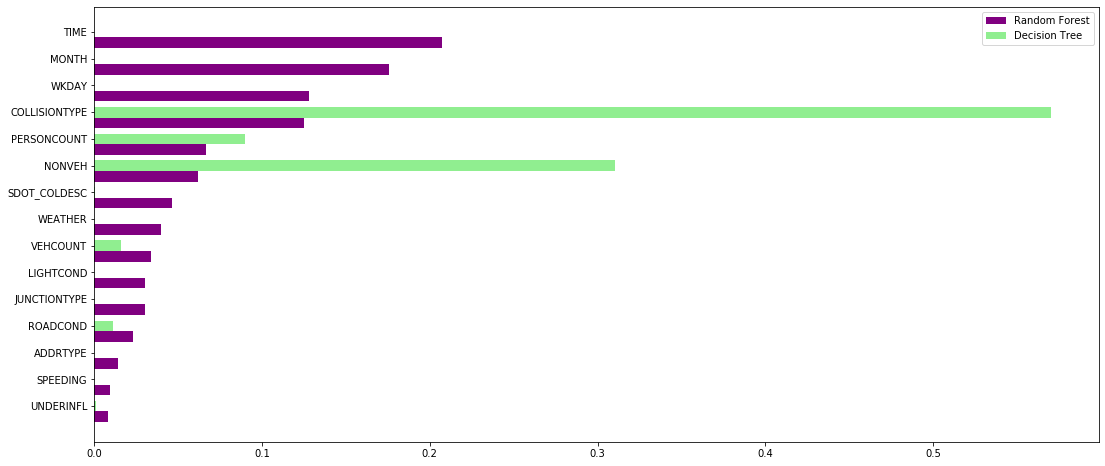

In [33]:
# https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/#:~:text=Each%20node%20in%20the%20decision,to%20generate%20the%20final%20output.&text=The%20Random%20Forest%20Algorithm%20combines,to%20generate%20the%20final%20output.

feature_importance=pd.DataFrame({
    'rfc':model.feature_importances_,
    'dt':SeverityTree.feature_importances_
},index=df.drop(columns=['SEVERITYDESC']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

It can be noticed, that decision tree model puts a higher importance to a particular set of features, while random forest focuses on different set of features. Thus, I will evaluate the feature correlation, the permutation importance  and eventually the "least" important ones will be dropped.

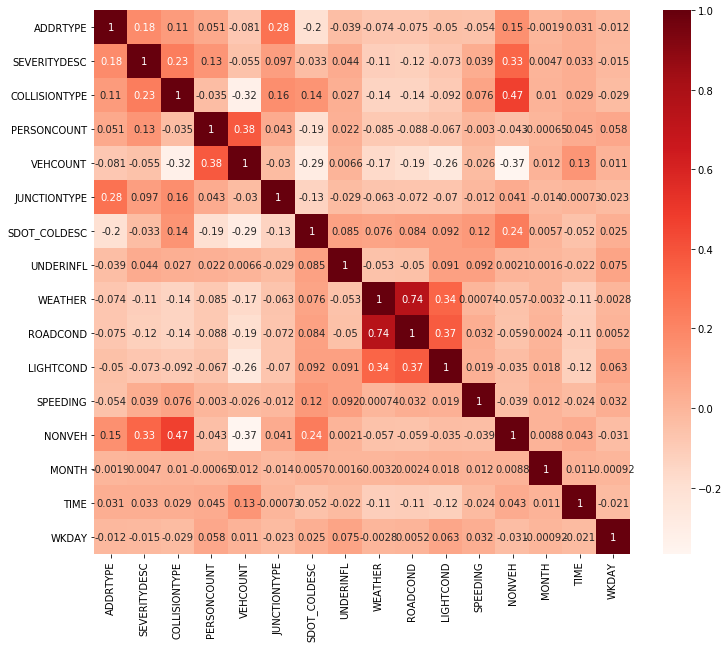

In [35]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_card.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation matrix implies that there are a relatively strong correlation between ROADCOND, LIGHTCOND and WEATHER, which is expected considering the fact that we have done a lot of cross checking between these two variables. Although the correlation matrix do not reveals which variables are worthy of dropping/keeping, the permutation importance algoritm might sugest some insights on this matter.

### Permutation Importance with Multicollinear or Correlated Features

In [36]:
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.inspection import permutation_importance

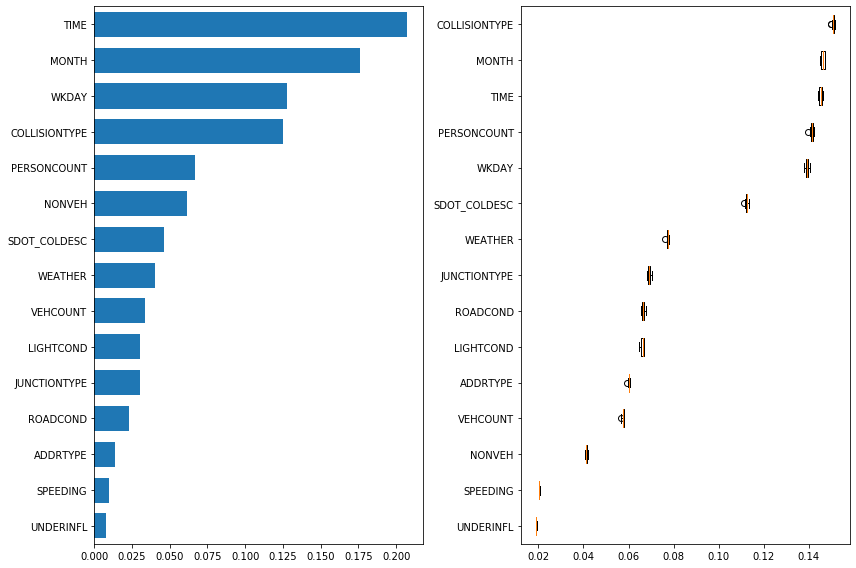

In [37]:
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py
result = permutation_importance(model, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(model.feature_importances_)
tree_indices = np.arange(0, len(model.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         model.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(x.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(model.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=x.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

According to the graph on the right, UNDERINFL and SPEEDING do not have a suficient impact on predicted variable, thus it might be dropped. Although, the literature is sugesting to keep variables that has an accuracy impact of at least 0.05, I will drop NONVEH, VEHCOUNT as well, since these variables represent only the 'after the accident' status not something that can influence the occurance of the accident itself.

### Reviewed Random Forest

In [38]:
rf=df_card.drop(['UNDERINFL','SPEEDING','NONVEH','VEHCOUNT'], axis=1)

In [40]:
X_rf=rf.drop(['SEVERITYDESC'], axis=1)
Y_rf=rf['SEVERITYDESC']
X_rf[0:5]

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,MONTH,TIME,WKDAY
0,1,1,2,1,0,2,1,0,3,14,2
1,0,4,2,0,4,1,1,1,12,18,2
2,0,0,4,0,1,2,0,0,11,10,3
3,0,5,3,0,0,0,0,0,3,9,4
4,1,1,2,1,0,1,1,0,1,8,2


In [41]:
Y_rf[0:5]

0    1
1    0
2    0
3    0
4    1
Name: SEVERITYDESC, dtype: int64

In [42]:
X_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   ADDRTYPE       194673 non-null  int64
 1   COLLISIONTYPE  194673 non-null  int64
 2   PERSONCOUNT    194673 non-null  int64
 3   JUNCTIONTYPE   194673 non-null  int64
 4   SDOT_COLDESC   194673 non-null  int64
 5   WEATHER        194673 non-null  int64
 6   ROADCOND       194673 non-null  int64
 7   LIGHTCOND      194673 non-null  int64
 8   MONTH          194673 non-null  int64
 9   TIME           194673 non-null  int64
 10  WKDAY          194673 non-null  int64
dtypes: int64(11)
memory usage: 16.3 MB


Running the Random Forest Classifier algorithm on a new smaller data set and listing previous results.

In [43]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, Y_rf, test_size=0.3, random_state=3)
RF_model = RandomForestClassifier()
RF_model.fit(X_rf_train, y_rf_train)
RF_Tree = RF_model.predict(X_rf_test)

In [44]:
# Decision Tree model Results
print("Decision Tree model results")

print("Decision Tree's Training set Accuracy: ", metrics.accuracy_score(y_train, SeverityTree.predict(X_train)))
print("Decision Tree's Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("Decision Tree's Training Set Evaluation F1-Score=>",f1_score(y_train, SeverityTree.predict(X_train)))
print("Decision Tree's Test Set Evaluation F1-Score=> ",f1_score(y_test, predTree))
print(classification_report(y_test, predTree))

#------------------------------------------------------------------------------------------

# Decision Tree model Results
print("Decision Tree model results")

print("Decision Tree's Training set Accuracy: ", metrics.accuracy_score(y_rf_train, SeverityTree.predict(X_rf_train)))
print("Decision Tree's Test set Accuracy: ", metrics.accuracy_score(y_rf_test, SeverityTree.predict(X_rf_test)))
print("Decision Tree's Training Set Evaluation F1-Score=>",f1_score(y_rf_train, SeverityTree.predict(X_rf_train)))
print("Decision Tree's Test Set Evaluation F1-Score=> ",f1_score(y_rf_test, SeverityTree.predict(X_rf_test)))
print(classification_report(y_rf_test, SeverityTree.predict(X_rf_test)))

#-----------------------------------------------------------------------------------------

# Random Forest model results
print("Random Forest model results")

print("Random Forest's Accuracy_score on train dataset : ", accuracy_train)
print("Random Forest's Accuracy_score on test dataset : ", accuracy_test)
print("Random Forest's Training Set Evaluation F1-Score=>",f1_score(y_train,predict_train))
print("Random Forest's Testing Set Evaluation F1-Score=>",f1_score(y_test,predict_test))  
print(classification_report(y_test, predict_test))

#-----------------------------------------------------------------------------------------

# Reviewed Random Forest model Results
print("Reviewed Random Forest model results")

# predict the target on the train dataset
predictRF_train = RF_model.predict(X_rf_train)
# predict the target on the test dataset
predictRF_test = RF_model.predict(X_rf_test)

# Accuracy Score on train dataset
accuracyRF_train = accuracy_score(y_rf_train,predictRF_train)
print("Reviewed Random Forest's Accuracy_score on train dataset : ", accuracyRF_train)
# Accuracy Score on test dataset
accuracyRF_test = accuracy_score(y_rf_test,predictRF_test)
print("Reviewed Random Forest's Accuracy_score on test dataset : ", accuracyRF_test)

print("Reviewed Random Forest's Training Set Evaluation F1-Score=>",f1_score(y_rf_train,predictRF_train))
print("Reviewed Random Forest's Testing Set Evaluation F1-Score=>",f1_score(y_rf_test,predictRF_test))
print(classification_report(y_rf_test, predictRF_test))

Decision Tree model results
Decision Tree's Training set Accuracy:  0.750915455232588
Decision Tree's Test set Accuracy:  0.7483990274305674
Decision Tree's Training Set Evaluation F1-Score=> 0.31070405946022783
Decision Tree's Test Set Evaluation F1-Score=>  0.3079966092116417
              precision    recall  f1-score   support

           0       0.74      0.99      0.85     40847
           1       0.89      0.19      0.31     17555

    accuracy                           0.75     58402
   macro avg       0.81      0.59      0.58     58402
weighted avg       0.78      0.75      0.68     58402

Random Forest model results
Random Forest's Accuracy_score on train dataset :  0.9493656023658739
Random Forest's Accuracy_score on test dataset :  0.7290846203897127
Random Forest's Training Set Evaluation F1-Score=> 0.912706846819493
Random Forest's Testing Set Evaluation F1-Score=> 0.4896458293013353
              precision    recall  f1-score   support

           0       0.78      0.86 

As a conclusion, the Reviewed Random Forest algorithm provides a similar performance of predicting the severity of accidents by using less features. That translates into less time and resource consumtion to predict the severity of the accidents.

Confusion matrix, without normalization
[[ 7496 10059]
 [ 6142 34705]]


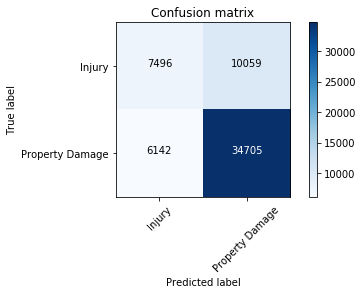

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_rf_test, predictRF_test, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury','Property Damage'],normalize= False,  title='Confusion matrix')

## Logistic Regression approach

Since the target feature takes binary values, it will be appropriate to use logistic regression algorithm and to check its performance against tree algorithms. While Decision Tree and Random Forest algorithms do not require normalization of the data, the Logistic Regression requires it. Thus, needed modules and steps will be taken.

In [49]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing

The same variables as for 'Reviewed Random Forest' algorithm will be used since the logic behind dropping the un-needed features remains the same and for the logistic regression algorithm.

In [51]:
lr=rf
print('Data shape: ', lr.shape)
lr.head()

Data shape:  (194673, 12)


,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,MONTH,TIME,WKDAY
0,1,1,1,2,1,0,2,1,0,3,14,2
1,0,0,4,2,0,4,1,1,1,12,18,2
2,0,0,0,4,0,1,2,0,0,11,10,3
3,0,0,5,3,0,0,0,0,0,3,9,4
4,1,1,1,2,1,0,1,1,0,1,8,2


In [52]:
X_lr=lr.drop(['SEVERITYDESC'], axis=1)
y_lr=lr['SEVERITYDESC']

Normilize the data set.

In [53]:
X_lr = preprocessing.StandardScaler().fit(X_lr).transform(X_lr)

In [54]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split( X_lr, y_lr, test_size=0.2, random_state=4)

In [55]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_lr_train,y_lr_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
yhat_lr = LR.predict(X_lr_test)
yhat_lr_prob = LR.predict_proba(X_lr_test)

### Evaluation

### Obtaining the Jackard Index

In [57]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_lr_test, yhat_lr)

/Users/olegsargu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7188134069603185

### Confusion Matrix

Confusion matrix, without normalization
[[ 2237  9273]
 [ 1675 25750]]


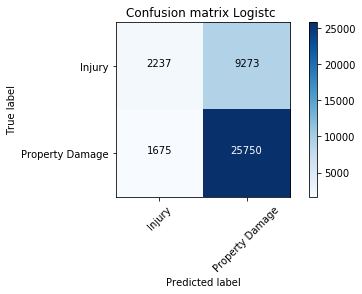

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix_lr = confusion_matrix(y_lr_test, yhat_lr, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=['Injury','Property Damage'],normalize= False,  title='Confusion matrix Logistc ')

### Classification Report

In [66]:
# logistic regression report
print (classification_report(y_lr_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.74      0.94      0.82     27425
           1       0.57      0.19      0.29     11510

    accuracy                           0.72     38935
   macro avg       0.65      0.57      0.56     38935
weighted avg       0.69      0.72      0.67     38935



### Log_Loss

In [67]:
from sklearn.metrics import log_loss
log_loss(y_lr_test, yhat_lr_prob)

0.5541521504625931

## K-Nearest Neighbors

In [68]:
from sklearn.neighbors import KNeighborsClassifier

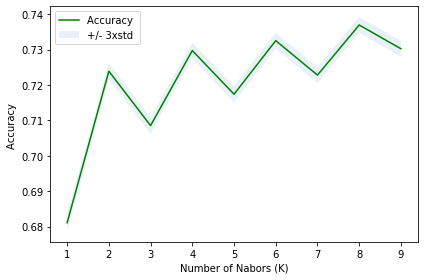

In [69]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_lr_train,y_lr_train)
    yhat_knn=knn.predict(X_lr_test)
    mean_acc[n-1] = metrics.accuracy_score(y_lr_test, yhat_knn)

    
    std_acc[n-1]=np.std(yhat_knn==y_lr_test)/np.sqrt(yhat_knn.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [70]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7369461923719018 with k= 8


In [71]:
print("Test set Accuracy: ", metrics.accuracy_score(y_lr_test, yhat_knn))

Test set Accuracy:  0.7302427122126621


In [73]:
print (classification_report(y_lr_test, yhat_knn))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     27425
           1       0.56      0.39      0.46     11510

    accuracy                           0.73     38935
   macro avg       0.67      0.63      0.64     38935
weighted avg       0.71      0.73      0.71     38935

